In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
X_train=pd.read_csv('train.csv')

In [5]:
X_train.shape

(841115, 47)

In [45]:
X_test=pd.read_csv('test.csv')

In [9]:
X_test.shape

(351544, 47)

In [46]:
X_test['prop_booking_bool']=-1

In [47]:
data = pd.concat([X_train, X_test]).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [48]:
train=data

In [49]:
train['prop_booking_bool'].unique()

array([ 0,  1, -1], dtype=int64)

In [18]:
train.shape

(1185901, 47)

In [50]:
train['prop_price_without_discount_usd']=train.groupby('prop_starrating')['prop_price_without_discount_usd'].transform(lambda x: x.fillna(x.median()))
train['prop_price_with_discount_usd']=train.groupby('prop_starrating')['prop_price_with_discount_usd'].transform(lambda x: x.fillna(x.median()))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


mu = 320 and sigma = 240
Skewness: 1.920512
Kurtosis: 6.593151


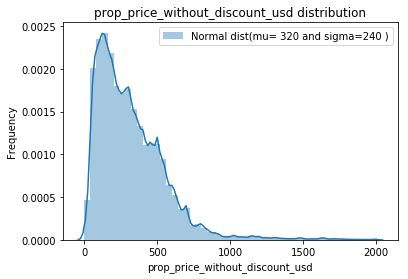

In [51]:
from scipy.stats import norm

train=train.loc[train['prop_price_without_discount_usd']<=2000]

sns.distplot(train['prop_price_without_discount_usd'])
(mu, sigma) = norm.fit(train['prop_price_without_discount_usd'])
print('mu = %d and sigma = %d' % (mu, sigma))
plt.legend(['Normal dist(mu= %d and sigma=%d )'% (mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('prop_price_without_discount_usd distribution')

print("Skewness: %f" % train['prop_price_without_discount_usd'].skew())
print("Kurtosis: %f" % train['prop_price_without_discount_usd'].kurt())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


mu = 218 and sigma = 160
Skewness: 2.146297
Kurtosis: 10.723536


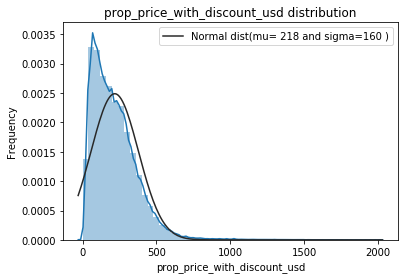

In [52]:
train['prop_price_with_discount_usd']=train.groupby('prop_starrating')['prop_price_with_discount_usd'].transform(lambda x: x.fillna(x.median()))

#train=train.loc[train['prop_country']=='UNITED STATES OF AMERICA']
train=train.loc[train['prop_price_with_discount_usd']<=2000]

sns.distplot(train['prop_price_with_discount_usd'], fit=norm)
(mu, sigma) = norm.fit(train['prop_price_with_discount_usd'])
print('mu = %d and sigma = %d' % (mu, sigma))
plt.legend(['Normal dist(mu= %d and sigma=%d )'% (mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('prop_price_with_discount_usd distribution')

print("Skewness: %f" % train['prop_price_with_discount_usd'].skew())
print("Kurtosis: %f" % train['prop_price_with_discount_usd'].kurt())

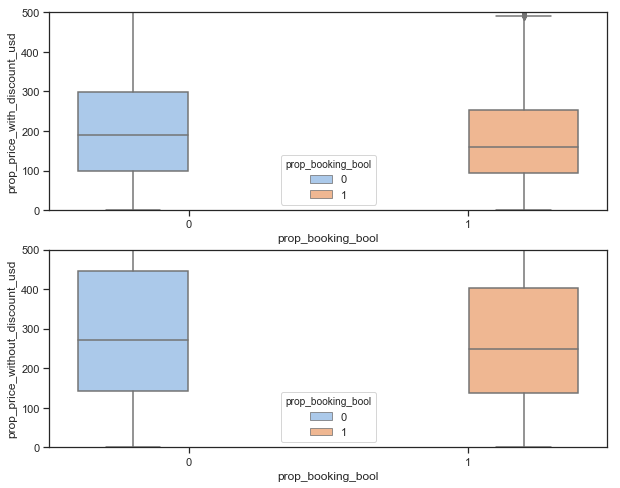

In [28]:
fig,(axis1, axis2)=plt.subplots(2,1, figsize=(10,8))
sns.set(style='ticks',palette='pastel')
axis1.set_ylim([0,500])
axis2.set_ylim([0,500])
sns.boxplot(x='prop_booking_bool', y='prop_price_with_discount_usd', hue='prop_booking_bool', ax=axis1, data=train)
sns.boxplot(x='prop_booking_bool', y='prop_price_without_discount_usd', hue='prop_booking_bool',ax=axis2, data=train)

In [29]:
train.groupby(['prop_booking_bool'])['prop_price_with_discount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
prop_booking_bool,,,,,,,,
0,812453.0,218.782976,160.177577,0.00,99.0,189.00,299.0,1999.95
1,23777.0,192.261253,156.767801,0.01,93.0,160.73,252.0,1998.00


In [30]:
train.groupby(['prop_booking_bool'])['prop_price_without_discount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
prop_booking_bool,,,,,,,,
0,812453.0,320.757352,240.598000,0.00,143.11,271.00,445.64,2000.0
1,23777.0,304.274717,243.402962,0.01,138.33,248.46,402.00,1998.0


In [13]:
train.shape

(836230, 47)

In [53]:
cat_cols = [col for col in train.columns if train[col].dtype == 'O']
cat_cols

['prop_continent',
 'prop_country',
 'prop_super_region',
 'srch_ci',
 'srch_co',
 'srch_currency',
 'srch_date_time',
 'srch_device',
 'srch_local_date',
 'srch_posa_continent',
 'srch_posa_country',
 'srch_visitor_id',
 'srch_visitor_loc_city',
 'srch_visitor_loc_country',
 'srch_visitor_loc_region',
 'srch_visitor_wr_member']

In [54]:
def convert_date_into_days(df):
    df['srch_ci'] = pd.to_datetime(df['srch_ci'])
    df['srch_co'] = pd.to_datetime(df['srch_co'])
    df['srch_local_date'] = pd.to_datetime(df['srch_local_date'])
    df['srch_date_time'] = pd.to_datetime(df['srch_date_time'])
    
    # For hotel check-in
    # Month, Year, Day
    df['Cin_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['Cin_year'] = df["srch_ci"].apply(lambda x: x.year)

In [55]:
cat_df = train[cat_cols]
convert_date_into_days(cat_df)
cat_df.info()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185901 entries, 0 to 1192658
Data columns (total 18 columns):
prop_continent              1185901 non-null object
prop_country                1185901 non-null object
prop_super_region           1185901 non-null object
srch_ci                     1185901 non-null datetime64[ns]
srch_co                     1185901 non-null datetime64[ns]
srch_currency               999112 non-null object
srch_date_time              1185901 non-null datetime64[ns]
srch_device                 1185901 non-null object
srch_local_date             1185901 non-null datetime64[ns]
srch_posa_continent         499230 non-null object
srch_posa_country           1185901 non-null object
srch_visitor_id             1185901 non-null object
srch_visitor_loc_city       1185901 non-null object
srch_visitor_loc_country    1185901 non-null object
srch_visitor_loc_region     1185679 non-null object
srch_visitor_wr_member      561075 non-null object
Cin_month                 

In [7]:
cat_df.head()

,srch_date_time,srch_visitor_id,srch_visitor_loc_country,srch_visitor_loc_region,srch_visitor_loc_city,srch_visitor_wr_member,srch_posa_continent,srch_posa_country,srch_ci,srch_co,srch_device,srch_currency,prop_super_region,prop_continent,prop_country,srch_local_date,Cin_month,Cin_year
0,2014-09-13 18:37:32,9373b009-4e10-495a-afae-204dd1fe4b7c,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",2015-02-25,2015-02-28,DESKTOP,TWD,APAC,ASIA,JAPAN,2014-09-13,2,2015
1,2014-09-13 18:37:32,9373b009-4e10-495a-afae-204dd1fe4b7c,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",2015-02-25,2015-02-28,DESKTOP,TWD,APAC,ASIA,JAPAN,2014-09-13,2,2015
2,2014-09-13 18:37:32,9373b009-4e10-495a-afae-204dd1fe4b7c,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",2015-02-25,2015-02-28,DESKTOP,TWD,APAC,ASIA,JAPAN,2014-09-13,2,2015
3,2014-09-13 18:37:32,9373b009-4e10-495a-afae-204dd1fe4b7c,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",2015-02-25,2015-02-28,DESKTOP,TWD,APAC,ASIA,JAPAN,2014-09-13,2,2015
4,2014-09-13 18:37:32,9373b009-4e10-495a-afae-204dd1fe4b7c,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",2015-02-25,2015-02-28,DESKTOP,TWD,APAC,ASIA,JAPAN,2014-09-13,2,2015


In [56]:
visitor_id=cat_df['srch_visitor_id']

cat_df.drop(['srch_date_time','srch_visitor_id','srch_ci','srch_co','srch_local_date'] , axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
cat_df.head()

,srch_visitor_loc_country,srch_visitor_loc_region,srch_visitor_loc_city,srch_visitor_wr_member,srch_posa_continent,srch_posa_country,srch_device,srch_currency,prop_super_region,prop_continent,prop_country,Cin_month,Cin_year
0,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",DESKTOP,TWD,APAC,ASIA,JAPAN,2,2015
1,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",DESKTOP,TWD,APAC,ASIA,JAPAN,2,2015
2,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",DESKTOP,TWD,APAC,ASIA,JAPAN,2,2015
3,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",DESKTOP,TWD,APAC,ASIA,JAPAN,2,2015
4,TWN,TPE,TAIPEI,Signed in - Persistent|WR Member|Remembered FC...,ASIA,"TAIWAN, REPUBLIC OF CHINA",DESKTOP,TWD,APAC,ASIA,JAPAN,2,2015


In [23]:
total=cat_df.isnull().sum().sort_values(ascending=False)
percentage= (cat_df.isnull().sum()/cat_df.shape[0]).sort_values(ascending=False)
missing=pd.concat([total,percentage],axis=1, keys=['Total','Percent'])
missing.head()

,Total,Percent
srch_posa_continent,686671,0.579029
srch_visitor_wr_member,624826,0.526879
srch_currency,186789,0.157508
srch_visitor_loc_region,222,0.000187
Cin_year,0,0.000000


In [57]:
cat_df.drop(['srch_posa_continent','srch_visitor_wr_member','srch_currency','srch_visitor_loc_region',
             'srch_visitor_loc_city','prop_super_region','prop_continent','srch_visitor_loc_region'], axis = 1, inplace = True)

In [58]:
cat_df.head()

,prop_country,srch_device,srch_posa_country,srch_visitor_loc_country,Cin_month,Cin_year
0,JAPAN,DESKTOP,"TAIWAN, REPUBLIC OF CHINA",TWN,2,2015
1,JAPAN,DESKTOP,"TAIWAN, REPUBLIC OF CHINA",TWN,2,2015
2,JAPAN,DESKTOP,"TAIWAN, REPUBLIC OF CHINA",TWN,2,2015
3,JAPAN,DESKTOP,"TAIWAN, REPUBLIC OF CHINA",TWN,2,2015
4,JAPAN,DESKTOP,"TAIWAN, REPUBLIC OF CHINA",TWN,2,2015


In [59]:
cat_df['Cin_year'] = cat_df['Cin_year'].map({2015: 0, 2014: 1})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
from sklearn.preprocessing import LabelEncoder

features = [x for x in cat_df.columns]
le = LabelEncoder()

for feat in features:
    value=list(cat_df[feat].unique())
    le.fit(value)
    cat_df[feat]=le.fit_transform(cat_df[feat])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
cat_df.head()

,prop_country,srch_device,srch_posa_country,srch_visitor_loc_country,Cin_month,Cin_year
0,2,0,60,149,1,0
1,2,0,60,149,1,0
2,2,0,60,149,1,0
3,2,0,60,149,1,0
4,2,0,60,149,1,0


In [42]:
train.shape

(836230, 47)

In [41]:
cat_df.shape

(836230, 5)

In [61]:
num_df = train.drop(columns = cat_cols, axis = 1)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185901 entries, 0 to 1192658
Data columns (total 31 columns):
prop_booking_bool                    1185901 non-null int64
prop_brand_bool                      1185901 non-null int64
prop_dotd_bool                       1185901 non-null int64
prop_hostel_bool                     1185901 non-null int64
prop_imp_drr                         1185901 non-null int64
prop_key                             1185901 non-null int64
prop_market_id                       1185901 non-null int64
prop_price_with_discount_local       1185839 non-null float64
prop_price_with_discount_usd         1185901 non-null float64
prop_price_without_discount_local    1185839 non-null float64
prop_price_without_discount_usd      1185901 non-null float64
prop_review_count                    1185888 non-null float64
prop_review_score                    1185888 non-null float64
prop_room_capacity                   1185901 non-null int64
prop_starrating                    

In [62]:
columns=['prop_price_without_discount_local','prop_price_with_discount_local']
num_df.drop(columns, axis=1, inplace=True)

In [81]:
columns=['srch_dest_longitude','srch_dest_latitude','srch_co_day','prop_imp_drr',
         'srch_mobile_bool', 'prop_travelad_bool','srch_mobile_app','prop_submarket_id','prop_hostel_bool']
num_df.drop(columns, axis=1, inplace=True)

In [31]:
total=num_df.isnull().sum().sort_values(ascending=False)
percentage= (num_df.isnull().sum()/num_df.shape[0]).sort_values(ascending=False)
missing=pd.concat([total,percentage],axis=1, keys=['Total','Percent'])
missing.head()

,Total,Percent
srch_children_cnt,18,0.000015
srch_adults_cnt,18,0.000015
prop_review_score,13,0.000011
prop_review_count,13,0.000011
srch_visitor_visit_nbr,0,0.000000


In [63]:
num_df.fillna(0, inplace=True)

In [64]:
num_df.drop(['prop_hostel_bool'], axis=1, inplace=True)

In [64]:
col = 'prop_review_score'
conditions  = [ num_df[col] >= 4, 
               (num_df[col] < 4) & (num_df[col]>=3), 
               (num_df[col] < 3) & (num_df[col]>=2),
               (num_df[col] < 2) & (num_df[col]>=1),
               num_df[col] <=1]
choices     = [ 4.5, 3.5, 2.5, 1.5, 0.5]
num_df['prop_review_score'] = np.select(conditions, choices, 0)

In [20]:
Num = ['prop_review_score','prop_market_id', 'srch_ci_day','srch_hcom_destination_id','prop_brand_bool',
      'prop_dotd_bool','prop_starrating','prop_booking_bool','srch_los']
df=num_df[Num]

In [82]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185901 entries, 0 to 1192658
Data columns (total 20 columns):
prop_booking_bool                  1185901 non-null int64
prop_brand_bool                    1185901 non-null int64
prop_dotd_bool                     1185901 non-null int64
prop_key                           1185901 non-null int64
prop_market_id                     1185901 non-null int64
prop_price_with_discount_usd       1185901 non-null float64
prop_price_without_discount_usd    1185901 non-null float64
prop_review_count                  1185901 non-null float64
prop_review_score                  1185901 non-null float64
prop_room_capacity                 1185901 non-null int32
prop_starrating                    1185901 non-null float64
srch_adults_cnt                    1185901 non-null float64
srch_bw                            1185901 non-null int64
srch_children_cnt                  1185901 non-null float64
srch_ci_day                        1185901 non-null int64
src

In [65]:
col = 'prop_room_capacity'
conditions  = [ num_df[col] >= 4000, 
               (num_df[col] < 4000) & (num_df[col]>=3000), 
               (num_df[col] < 3000) & (num_df[col]>=1000),
               (num_df[col] < 1000) & (num_df[col]>=0),
               num_df[col] <0]
choices     = [4000, 3500, 2000, 500, 0]
num_df['prop_room_capacity'] = np.select(conditions, choices, 0)

In [66]:
num_df['srch_visitor_visit_nbr']=np.where((num_df['srch_visitor_visit_nbr']>100), 100, num_df['srch_visitor_visit_nbr'])

In [67]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185901 entries, 0 to 1192658
Data columns (total 29 columns):
prop_booking_bool                  1185901 non-null int64
prop_brand_bool                    1185901 non-null int64
prop_dotd_bool                     1185901 non-null int64
prop_hostel_bool                   1185901 non-null int64
prop_imp_drr                       1185901 non-null int64
prop_key                           1185901 non-null int64
prop_market_id                     1185901 non-null int64
prop_price_with_discount_usd       1185901 non-null float64
prop_price_without_discount_usd    1185901 non-null float64
prop_review_count                  1185901 non-null float64
prop_review_score                  1185901 non-null float64
prop_room_capacity                 1185901 non-null int32
prop_starrating                    1185901 non-null float64
prop_submarket_id                  1185901 non-null int64
prop_travelad_bool                 1185901 non-null int64
srch_ad

In [68]:
def normalize(col):
    max_value = col.max()
    min_value = col.min()
    
    col = (col - min_value) / (max_value - min_value)
    return col

In [104]:
num_df['prop_review_count'] = normalize(num_df['prop_review_count'])
num_df['prop_room_capacity'] = normalize(num_df['prop_room_capacity'])
num_df['prop_price_without_discount_usd'] = normalize(num_df['prop_price_without_discount_usd'])
num_df['prop_price_with_discount_usd'] = normalize(num_df['prop_price_with_discount_usd'])
num_df['srch_bw'] = normalize(num_df['srch_bw'])
num_df['srch_visitor_visit_nbr'] = normalize(num_df['srch_visitor_visit_nbr'])
num_df['srch_los'] = normalize(num_df['srch_los'])
num_df['srch_ci_day'] = normalize(num_df['srch_ci_day'])

In [58]:
num_df.head()

,prop_booking_bool,prop_brand_bool,prop_dotd_bool,prop_market_id,prop_price_with_discount_usd,prop_price_without_discount_usd,prop_review_count,prop_review_score,prop_room_capacity,prop_starrating,srch_adults_cnt,srch_bw,srch_ci_day,srch_hcom_destination_id,srch_los,srch_rm_cnt,srch_visitor_visit_nbr
0,0,1,0,60041,0.055900,0.093360,0.012439,4.5,0.125,3.5,2.0,0.346723,0.5,728660,0.074074,1,0.040404
1,0,0,0,60041,0.046120,0.076855,0.003117,3.5,0.125,3.0,2.0,0.346723,0.5,728660,0.074074,1,0.040404
2,0,1,0,60041,0.046990,0.233625,0.036699,4.5,0.125,3.5,2.0,0.346723,0.5,728660,0.074074,1,0.040404
3,0,1,0,60041,0.086650,0.238325,0.006821,4.5,0.125,5.0,2.0,0.346723,0.5,728660,0.074074,1,0.040404
4,0,0,0,60041,0.043125,0.090695,0.021667,3.5,0.125,3.0,2.0,0.346723,0.5,728660,0.074074,1,0.040404


In [83]:
X_train = pd.concat([cat_df, num_df], axis = 1)

In [84]:
X_train.shape

(1185901, 26)

In [85]:
X_train=X_train.loc[X_train['srch_adults_cnt']>0]

In [70]:
X_train.shape

(1185883, 35)

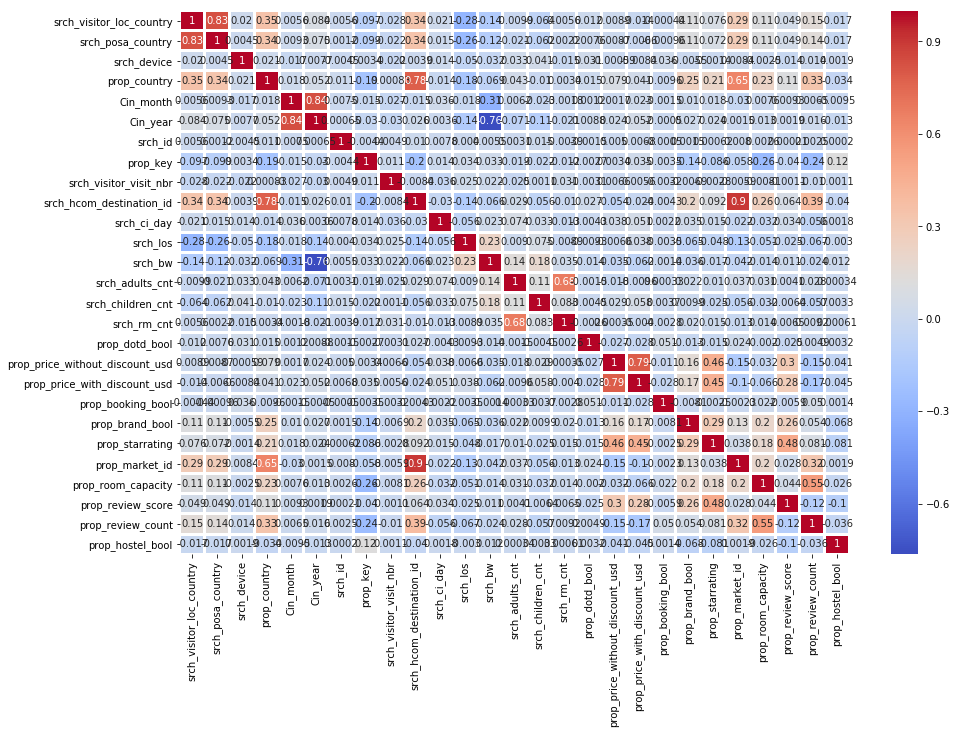

In [35]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(X_train.corr(),cmap='coolwarm',ax=ax,annot=True, linewidths=2)

In [86]:
Train=X_train

In [87]:
Train['prop_booking_bool'].unique()

array([ 0,  1, -1], dtype=int64)

In [90]:
X_train = Train[Train['prop_booking_bool'] != -1].reset_index(drop=True)

In [88]:
X_test = Train[Train['prop_booking_bool'] == -1].reset_index(drop=True)
X_test.drop(['prop_booking_bool'], axis=1, inplace=True)

In [89]:
X_test.shape

(349671, 25)

In [91]:
X_train.shape

(836212, 26)

In [94]:
book_indices = X_train[X_train['prop_booking_bool']==1].index

random_indices = np.random.choice(book_indices, len(X_train.loc[X_train['prop_booking_bool'] == 1]), replace=False)
book_sample = X_train.loc[random_indices]

not_book = X_train[X_train['prop_booking_bool'] == 0].index
random_indices = np.random.choice(not_book, sum(X_train['prop_booking_bool']), replace=False)
not_book_sample = X_train.loc[random_indices]

xtrain = pd.concat([not_book_sample, book_sample], axis=0)

print("Percentage of not  book: ", len(xtrain[xtrain['prop_booking_bool']==0])/len(xtrain))
print("Percentage of book: ", len(xtrain[xtrain['prop_booking_bool']==1])/len(xtrain))
print("Total number of records in resampled data: ", len(xtrain))

Percentage of not  book:  0.5
Percentage of book:  0.5
Total number of records in resampled data:  47550


In [35]:
xtrain.shape

(48026, 15)

In [27]:
xtrain['prop_key'].nunique()

3382

In [183]:
pieces=[X_train.groupby(['srch_hcom_destination_id', 'prop_country','prop_market_id'])['prop_booking_bool'].agg(['sum','count'])]
agg=pd.concat(pieces).groupby(level=[0,1,2]).sum()
agg.head()

sum  count
srch_hcom_destination_id prop_country prop_market_id              
504261                   0            407            -24105  87691
                                      61469             -77    196
                                      101939           -170    458
                                      102059              0      1
                                      108227           -118    224

In [184]:
agg['sum_and_cnt']=0.85*agg['sum']+0.15*agg['count']
agg=agg.groupby(level=[0,1]).apply(lambda x: x.astype(float)/x.sum())
agg.reset_index(inplace=True)
agg.dropna(inplace=True)

In [185]:
agg.head()

,srch_hcom_destination_id,prop_country,prop_market_id,sum,count,sum_and_cnt
0,504261,0,407,0.941970,0.951230,0.925809
1,504261,0,61469,0.003009,0.002126,0.004550
2,504261,0,101939,0.006643,0.004968,0.009567
3,504261,0,102059,-0.000000,0.000011,-0.000019
4,504261,0,108227,0.004611,0.002430,0.008418


In [186]:
agg_pivot=agg.pivot_table(index=['srch_hcom_destination_id','prop_country'],columns='prop_market_id',
                         values='sum_and_cnt')

In [187]:
x_train=pd.merge(xtrain,agg_pivot, how='left',on=['srch_hcom_destination_id','prop_country'])
x_train.fillna(0, inplace=True)

In [ ]:
X_train.loc[:, features].values[:, 0]

In [193]:
features=['srch_hcom_destination_id','prop_country','prop_market_id']
X_train.loc[:, features].values.shape[1]

3

In [178]:
book_indices = X_train[X_train['prop_booking_bool']==1].index

random_indices = np.random.choice(book_indices, len(X_train.loc[X_train['prop_booking_bool'] == 1]), replace=False)
book_sample = X_train.loc[random_indices]

not_book = X_train[X_train['prop_booking_bool'] == 0].index
random_indices = np.random.choice(not_book, sum(X_train['prop_booking_bool']), replace=False)
not_book_sample = X_train.loc[random_indices]

xtrain = pd.concat([not_book_sample, book_sample], axis=0)

print("Percentage of not  book: ", len(xtrain[xtrain['prop_booking_bool']==0])/len(xtrain))
print("Percentage of book: ", len(xtrain[xtrain['prop_booking_bool']==1])/len(xtrain))
print("Total number of records in resampled data: ", len(xtrain))

Percentage of not  book:  0.5
Percentage of book:  0.5
Total number of records in resampled data:  47550


In [179]:
xtrain.shape

(47550, 78)

In [81]:
Y=x_train['prop_booking_bool']
x_train.drop(['prop_booking_bool'], axis=1, inplace=True)
Y=Y.values.tolist()

In [72]:
xtrain.drop(['prop_hostel_bool'], axis=1, inplace=True)

In [135]:
len(Y)

48022

In [85]:
from sklearn.preprocessing import LabelEncoder

features = [x for x in x_train.columns]
le = LabelEncoder()

for feat in features:
    value=list(x_train[feat].unique())
    le.fit(value)
    x_train[feat]=le.fit_transform(x_train[feat])

In [157]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47550 entries, 294573 to 455622
Data columns (total 23 columns):
prop_country                47550 non-null int32
srch_device                 47550 non-null int32
srch_posa_country           47550 non-null int32
srch_visitor_loc_country    47550 non-null int32
Cin_month                   47550 non-null int64
Cin_year                    47550 non-null int64
prop_booking_bool           47550 non-null int64
prop_brand_bool             47550 non-null int64
prop_dotd_bool              47550 non-null int64
prop_key                    47550 non-null int64
prop_market_id              47550 non-null int64
prop_review_count           47550 non-null float64
prop_review_score           47550 non-null float64
prop_room_capacity          47550 non-null int32
prop_starrating             47550 non-null float64
srch_adults_cnt             47550 non-null float64
srch_bw                     47550 non-null int64
srch_ci_day                 47550 non-null i

In [95]:
xtrain.to_csv('x_train.csv', index=False)
X_test.to_csv('x_test.csv',index=False)

In [36]:
xtrain.shape

(48026, 15)

In [92]:
X_test.shape

(349671, 25)

In [153]:
train=pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')

In [154]:
train.head()

,prop_country,srch_device,srch_posa_country,srch_visitor_loc_country,Cin_month,Cin_year,prop_booking_bool,prop_brand_bool,prop_dotd_bool,prop_key,...,prop_room_capacity,prop_starrating,srch_adults_cnt,srch_bw,srch_ci_day,srch_hcom_destination_id,srch_id,srch_los,srch_rm_cnt,srch_visitor_visit_nbr
0,7,0,33,75,4,0,0,0,0,263211,...,500,3.0,2.0,187,4,1504033,1675011581,2,1,100
1,6,0,63,153,10,1,0,1,0,1098965,...,2000,4.0,2.0,28,7,549499,-937473430,1,1,2
2,7,0,66,154,9,1,0,1,0,242706,...,500,4.0,1.0,8,6,1506246,821766222,1,1,1
3,7,0,66,154,10,1,0,1,0,248735,...,500,3.0,1.0,31,5,1504033,-1456446884,3,1,3
4,6,0,63,154,10,1,0,1,0,242138,...,500,4.5,1.0,12,7,549499,-460547863,1,1,1


In [83]:
ytrain=np.array(Y)
np.savetxt('y_train.csv', ytrain)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [113]:
xtrain.head()

,prop_country,srch_device,srch_posa_country,srch_visitor_loc_country,Cin_month,Cin_year,prop_booking_bool,prop_brand_bool,prop_dotd_bool,prop_hostel_bool,...,prop_starrating,srch_adults_cnt,srch_bw,srch_children_cnt,srch_ci_day,srch_hcom_destination_id,srch_id,srch_los,srch_rm_cnt,srch_visitor_visit_nbr
74228,7,0,66,154,9,1,0,1,0,0,...,3.5,2.0,0.006342,0.0,0.666667,1506246,1789049048,0.000000,1,0.010101
367697,7,1,66,154,1,0,0,1,0,0,...,2.0,2.0,0.260042,0.0,0.666667,1497539,-1028417738,0.074074,1,0.000000
659560,1,0,66,154,9,1,0,0,0,0,...,4.0,2.0,0.004228,0.0,0.666667,712491,686889237,0.111111,1,0.010101
371297,7,0,66,154,9,1,0,1,0,0,...,4.0,1.0,0.006342,0.0,0.833333,1506246,1846946962,0.000000,1,0.040404
683430,0,0,66,154,11,1,0,0,0,0,...,3.0,2.0,0.171247,0.0,0.500000,504261,-550312676,0.111111,1,0.000000


In [114]:
Y=xtrain['prop_booking_bool']
xtrain.drop(['prop_booking_bool'], axis=1, inplace=True)

In [115]:
xtrain.shape

(47550, 26)

In [116]:
Y=Y.values.tolist()

In [309]:
X_train, X_test, y_train, y_test=train_test_split(xtrain, Y, test_size = 0.3, random_state=1)

In [77]:
rf =RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
bagg = BaggingClassifier(n_estimators=71,random_state=42)
extra = ExtraTreesClassifier(n_estimators=57,random_state=42)
ada = AdaBoostClassifier(n_estimators=51,random_state=42)
grad = GradientBoostingClassifier(n_estimators=101,random_state=42)
classifier_list = [rf,bagg,extra,ada,grad]
classifier_name_list = ['Random Forests','Bagging','Extra Trees','AdaBoost','Gradient Boost']

In [78]:
def get_ensemble_models():
    rf =RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
    bagg = BaggingClassifier(n_estimators=51,random_state=42)
    extra = ExtraTreesClassifier(n_estimators=51,random_state=42)
    ada = AdaBoostClassifier(n_estimators=51,random_state=42)
    grad = GradientBoostingClassifier(n_estimators=51,random_state=42)
    classifier_list = [rf,bagg,extra,ada,grad]
    classifier_name_list = ['Random Forests','Bagging','Extra Trees','AdaBoost','Gradient Boost']
    return classifier_list,classifier_name_list

In [149]:
rf.fit(X_train,y_train)
print_evaluation_metrics(rf,'Random Forests',X_test,y_test)

--------- Model :  Random Forests  ---------------

              precision    recall  f1-score   support

           0       0.66      0.65      0.66      4782
           1       0.65      0.66      0.66      4728

   micro avg       0.66      0.66      0.66      9510
   macro avg       0.66      0.66      0.66      9510
weighted avg       0.66      0.66      0.66      9510

Accuracy Score :  0.6588853838065194
---------------------------------------



In [79]:
def print_evaluation_metrics(trained_model,trained_model_name,X_test,y_test):
    predicted_values = trained_model.predict(X_test)
    print(metrics.classification_report(y_test,predicted_values))
    print("Accuracy Score : ",metrics.accuracy_score(y_test,predicted_values))
    print("---------------------------------------\n")

In [ ]:
classifier_list, classifier_name_list = get_ensemble_models()
for classifier,classifier_name in zip(classifier_list,classifier_name_list):
    classifier.fit(X_train,y_train)
    print_evaluation_metrics(classifier,classifier_name,X_test,y_test)

In [75]:
def feature_importance_plot(importance_sorted, title):
    df = pd.DataFrame(importance_sorted, columns=['feature', 'fscore'])
    df['fscore'] = df['fscore'] / df['fscore'].sum()

    plt.figure()
    # df.plot()
    df.plot(kind='barh', x='feature', y='fscore',
            legend=False, figsize=(12, 10))
    plt.title('XGBoost Feature Importance')
    plt.xlabel('relative importance')
    plt.tight_layout()
    plt.savefig(title + '.png', dpi=300)
    plt.show()

In [76]:
def xgb_importance(X_train, X_test, y_train, y_test, xgb_params, ntree, early_stop, plot_title):

    dtrain = xgb.DMatrix(X_train, y_train)
    dtest = xgb.DMatrix(X_test, y_test)

    watchlist = [(dtrain, 'train'), (dtest, 'validate')]

    xgb_model = xgb.train(xgb_params, dtrain, ntree, evals=watchlist,
                          early_stopping_rounds=early_stop, verbose_eval=5)

    importance = xgb_model.get_fscore()
    importance_sorted = sorted(importance.items(), key=operator.itemgetter(1))
    feature_importance_plot(importance_sorted, plot_title)

In [117]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier  # wrapper
import scipy.stats as st

params_sk = {
    'objective': 'binary:logistic',
    'subsample': 0.8,
    'colsample_bytree': 0.85,
    'seed': 42}

skrg = XGBClassifier(**params_sk)


params_grid = {"n_estimators": st.randint(50, 500),
               'max_depth': st.randint(5, 30)
               }
search_sk = RandomizedSearchCV(skrg, params_grid, cv=5, scoring='roc_auc', random_state=1, n_iter=10)  # 5 fold cross validation
search_sk.fit(xtrain, Y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:25:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:27:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:29:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:30:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:31:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:32:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:33:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:34:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:42:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:43:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:48:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:50:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:53:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:54:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.85,
       enable_categorical=False, gamma=None, gpu_id=None,
       importance_type=None, interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max...mple=0.8, tree_method=None, use_label_encoder=True,
       validate_parameters=None, verbosity=None),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024180FE2588>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024180FE24E0>},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [118]:
# best parameters
print("best parameters:", search_sk.best_params_)
print("best score:", search_sk.best_score_)

best parameters: {'max_depth': 5, 'n_estimators': 194}
best score: 0.7008872657150975


In [119]:
import xgboost as xgb
import operator

test_ratio = 0.2
X_train, X_val, y_train, y_val = train_test_split(xtrain, Y, test_size=test_ratio,random_state=42)

dtrain = xgb.DMatrix(X_train, y_train)
dval = xgb.DMatrix(X_val, y_val)

watchlist = [(dtrain, 'train'), (dval, 'validate')]
early_stop = 20

In [120]:
params_new = {**params_sk, **search_sk.best_params_}

model_final = xgb.train(params_new, dtrain, evals=watchlist, early_stopping_rounds=early_stop, verbose_eval=True)

[12:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.67542	validate-logloss:0.67834
[1]	train-logloss:0.66534	validate-logloss:0.66922
[2]	train-logloss:0.65739	validate-logloss:0.66251
[3]	train-logloss:0.65094	validate-logloss:0.65721
[4]	train-logloss:0.64751	validate-logloss:0.65441
[5]	train-logl

In [121]:
Test=X_test

In [122]:
# prediction to testing data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_test = xgb.DMatrix(X_test)
y_pred = model_final.predict(X_test)

In [123]:
y_pred

array([0.5042258 , 0.5856177 , 0.4715971 , ..., 0.59938085, 0.52030426,
       0.5696452 ], dtype=float32)

In [124]:
xtest=Test[['srch_id','prop_key']]
xtest['score']=y_pred
xtest=xtest.sort_values(by=['srch_id','score'], ascending=(True,False))
xtest.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,srch_id,prop_key,score
258272,-2147403968,544714,0.635857
258235,-2147403968,358698,0.620161
258244,-2147403968,364047,0.620161
258251,-2147403968,288103,0.620161
258253,-2147403968,3802344,0.608010


In [125]:
test=xtest[['srch_id','prop_key']]

In [196]:
xtest.shape

(349671, 3)

In [127]:
test.to_csv('submission.csv',header=['srch_id','prop_key'], index=False)

In [319]:
y_pred= np.where(y_pred > 0.5, 1, 0)
y_pred=y_pred.tolist()

In [320]:
acc_xgb= accuracy_score(y_test,y_pred)

print(f"Accuracy of XGBoost is : {acc_xgb}")

Accuracy of XGBoost is : 0.6358920434630214


-----Xgboost Using Datetime Features Only------ 
---Grid Search model feature importance---


<Figure size 432x288 with 0 Axes>

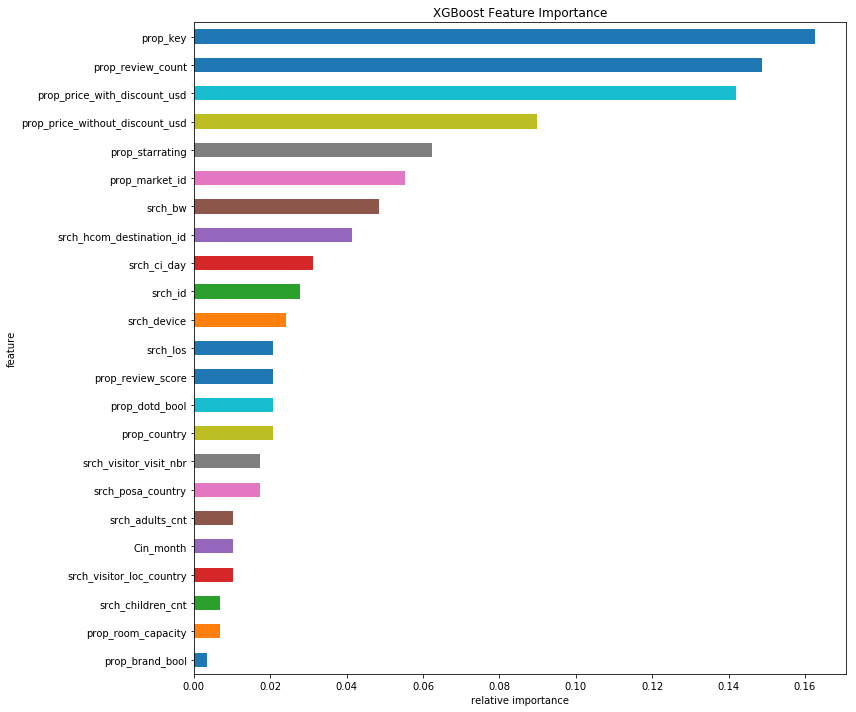

In [128]:
print('-----Xgboost Using Datetime Features Only------',
      '\n---Grid Search model feature importance---')
importance = model_final.get_fscore()
importance_sorted = sorted(importance.items(), key=operator.itemgetter(1))
fig1 = feature_importance_plot(importance_sorted, 'feature importance')
plt.show()

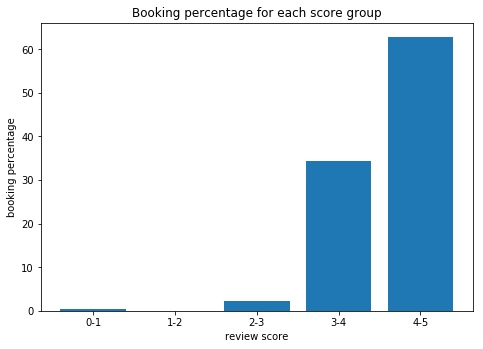

In [58]:
review_percent=[]
train_book=train.loc[train['prop_booking_bool']==1]

for i in range(5):
    score=train_book.loc[(train['prop_review_score']>=i)&(train['prop_review_score']<i+1)]
    percent = score.shape[0]/train_book.shape[0]*100
    review_percent.append(percent)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0-1', '1-2', '2-3', '3-4', '4-5']
ax.bar(langs,review_percent)
plt.xlabel('review score')
plt.ylabel('booking percentage')
plt.title('Booking percentage for each score group')
plt.show()

In [54]:
star_percent=[]

for i in range(5):
    star=train.loc[train['prop_starrating']==i+1]
    percent = star.loc[star['prop_booking_bool']==1].shape[0]/star.shape[0]*100
    star_percent.append(percent)

In [56]:
star_percent

[3.4527566363467606,
 2.1290252096249964,
 2.8730731803183076,
 3.143344594973792,
 1.9911062256420506]

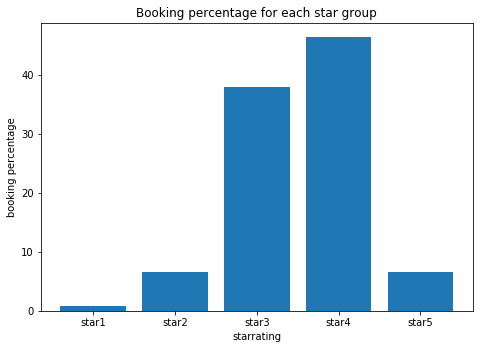

In [61]:
star_percent=[]
train['prop_starrating']=train['prop_starrating'].astype(int)
train_book=train.loc[train['prop_booking_bool']==1]

for i in range(5):
    star=train_book.loc[train['prop_starrating']==i+1]
    percent = star.shape[0]/train_book.shape[0]*100
    star_percent.append(percent)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['star1', 'star2', 'star3', 'star4', 'star5']
ax.bar(langs,star_percent)
plt.xlabel('starrating')
plt.ylabel('booking percentage')
plt.title('Booking percentage for each star group')
plt.show()

In [16]:
deal=train.loc[train['prop_dotd_bool']==1]
percentage = deal.loc[deal['prop_booking_bool']==1].shape[0]/deal.shape[0]*100
print('percentage of people booking the property with daily deal is %.2f'%percentage)

percentage of people booking the property with daily deal is 16.64


In [17]:
deal=train.loc[train['prop_dotd_bool']==0]
percentage = deal.loc[deal['prop_booking_bool']==1].shape[0]/deal.shape[0]*100
print('percentage of people booking the property without daily deal is %.2f'%percentage)

percentage of people booking the property without daily deal is 2.80


In [ ]:
columns = ['date_time', 'srch_ci','visitor_id','srch_destination_type_id','srch_destination_id', 'site_name', 'user_location_region', 'user_location_city', 
                              'user_id', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

In [ ]:
columns=['srch_date_time','srch_visitor_id','srch_ci','srch_co','srch_ci_day','srch_co_day','']

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841115 entries, 0 to 841114
Data columns (total 47 columns):
srch_id                              841115 non-null int64
prop_key                             841115 non-null int64
srch_date_time                       841115 non-null object
srch_visitor_id                      841115 non-null object
srch_visitor_visit_nbr               841115 non-null int64
srch_visitor_loc_country             841115 non-null object
srch_visitor_loc_region              840992 non-null object
srch_visitor_loc_city                841115 non-null object
srch_visitor_wr_member               396237 non-null object
srch_posa_continent                  355867 non-null object
srch_posa_country                    841115 non-null object
srch_hcom_destination_id             841115 non-null int64
srch_dest_longitude                  841115 non-null float64
srch_dest_latitude                   841115 non-null float64
srch_ci                              841115 non-nul

In [9]:
total=train.isnull().sum().sort_values(ascending=False)
percentage= (train.isnull().sum()/train.shape[0]).sort_values(ascending=False)
missing=pd.concat([total,percentage],axis=1, keys=['Total','Percent'])
missing.head(10)

,Total,Percent
srch_posa_continent,485248,0.576910
srch_visitor_wr_member,444878,0.528915
srch_currency,134104,0.159436
srch_visitor_loc_region,123,0.000146
prop_price_without_discount_usd,51,0.000061
prop_price_with_discount_local,51,0.000061
prop_price_with_discount_usd,51,0.000061
prop_price_without_discount_local,51,0.000061
srch_children_cnt,18,0.000021
srch_adults_cnt,18,0.000021


In [32]:
missing.head(13)

,Total,Percent
srch_posa_continent,485248,0.576910
srch_visitor_wr_member,444878,0.528915
srch_currency,134104,0.159436
srch_visitor_loc_region,123,0.000146
prop_price_without_discount_usd,51,0.000061
prop_price_with_discount_local,51,0.000061
prop_price_with_discount_usd,51,0.000061
prop_price_without_discount_local,51,0.000061
srch_children_cnt,18,0.000021
srch_adults_cnt,18,0.000021


In [25]:
train.drop(['srch_posa_continent', 'srch_visitor_wr_member'], axis=1, inplace=True)

In [16]:
label=train['srch_visitor_loc_city']

In [17]:
label.head()

18         TAIPEI
49          LEEDS
58        ANAHEIM
71         CARMEL
88    MIAMI BEACH
Name: srch_visitor_loc_city, dtype: object

In [25]:
country_counts= train['srch_visitor_loc_country'].value_counts().sort_values(ascending=False)
country_counts['UNITED STATES OF AMERICA']

462441

In [27]:
country_counts['UNITED STATES OF AMERICA']/country_counts.sum()*100

55.30069478492759

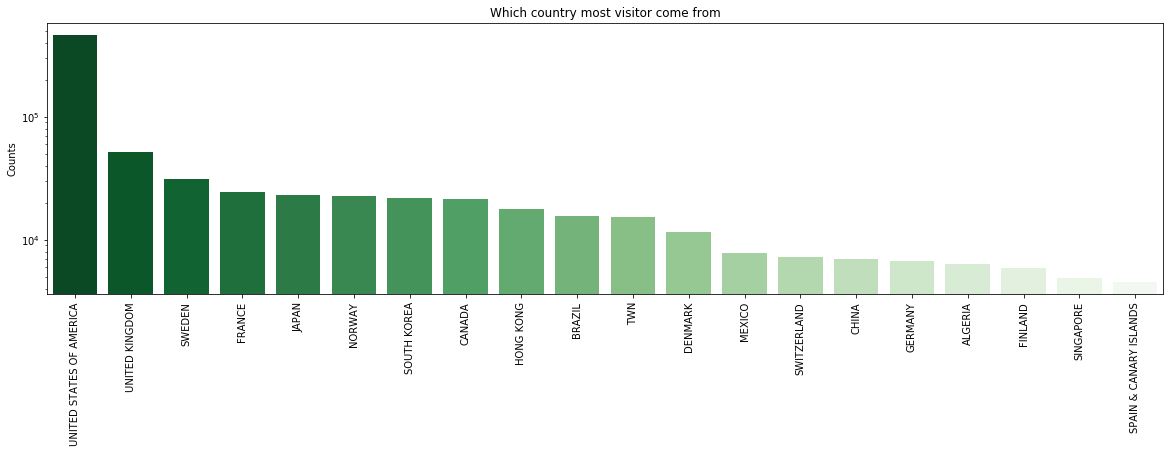

In [68]:
country_counts= train['srch_visitor_loc_country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel('Counts')
plt.title('Which country most visitor come from')
plt.xticks(rotation=90)
plt.yscale('log')

In [29]:
country_counts['UNITED STATES OF AMERICA']/country_counts.sum()*100

66.04917307439341

In [34]:
destination=train['prop_country'].value_counts().sort_values(ascending=False)
percentage= train['prop_country'].value_counts()/destination.sum()*100
destination_distribution=pd.concat([destination,percentage],axis=1, keys=['Count','Percent'])
destination_distribution

,Count,Percent
UNITED STATES OF AMERICA,552323,66.049173
UNITED KINGDOM,107043,12.800665
JAPAN,69866,8.354878
FRANCE,64549,7.719049
SOUTH KOREA,26671,3.189434
ITALY,15776,1.886562
MARTINIQUE,2,0.000239


Text(0.5, 1.0, 'Destination distribution')

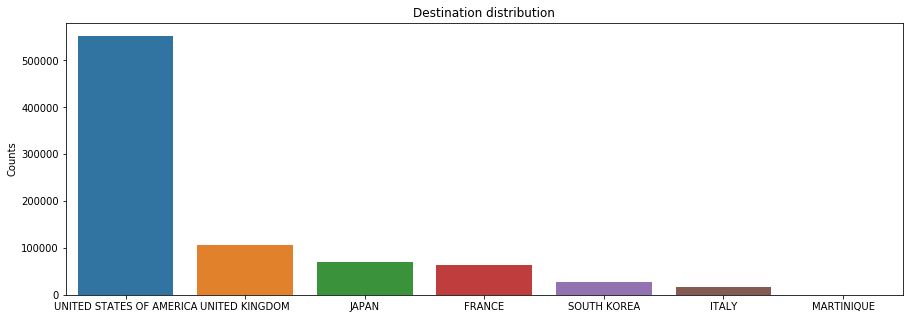

In [39]:
country_counts = train['prop_country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ax=sns.barplot(country_counts.index, country_counts.values)
plt.ylabel('Counts')
plt.title('Destination distribution')


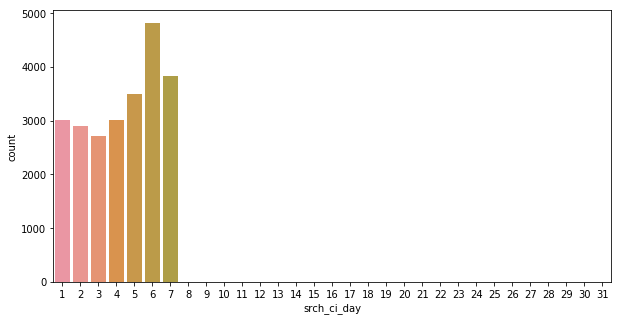

In [43]:
# Count the bookings as per the day
fig, ax=plt.subplots()
fig.set_size_inches(10,5)
sns.countplot('srch_ci_day', data=train[train['prop_booking_bool'] == 1], order=list(range(1,32)),ax=ax)

In [48]:
def convert_date_into_days(df):
    df['srch_ci'] = pd.to_datetime(df['srch_ci'])
    df['srch_co'] = pd.to_datetime(df['srch_co'])
    df['srch_local_date'] = pd.to_datetime(df['srch_local_date'])
    df['srch_date_time'] = pd.to_datetime(df['srch_date_time'])
    
    # For hotel check-in
    # Month, Year, Day
    df['Cin_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['Cin_year'] = df["srch_ci"].apply(lambda x: x.year)
    

In [49]:
convert_date_into_days(train)

In [55]:
data_2014.shape[0]/(data_2014.shape[0]+data_2015.shape[0])

0.938240675412267

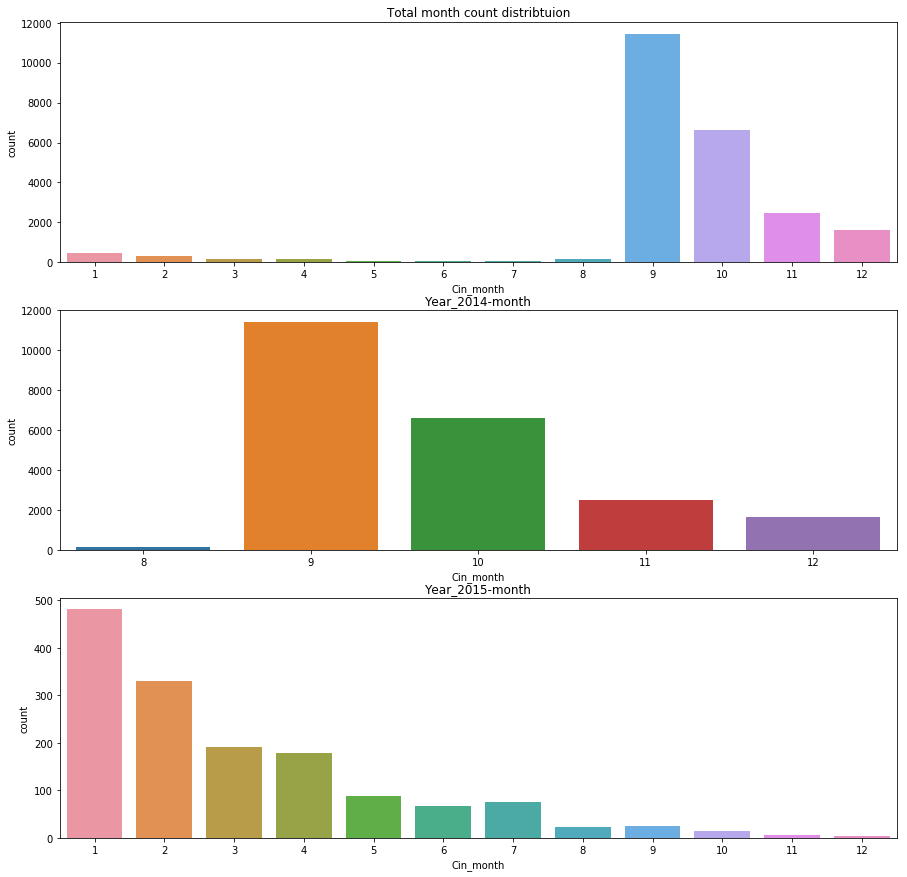

In [54]:
fig, (axis1, axis2,axis3)=plt.subplots(3,1,figsize=(15,15))

data_2014=train.loc[(train['Cin_year']==2014)]
data_2015=train.loc[(train['Cin_year']==2015)]

sns.countplot('Cin_month',data=train[train['prop_booking_bool'] == 1],ax=axis1).set(title='Total month count distribtuion')
sns.countplot('Cin_month',data=data_2014[data_2014['prop_booking_bool'] == 1],ax=axis2).set(title='Year_2014-month')
sns.countplot('Cin_month',data=data_2015[data_2015['prop_booking_bool'] == 1],ax=axis3).set(title='Year_2015-month')
fig.savefig('month_count_distribution')

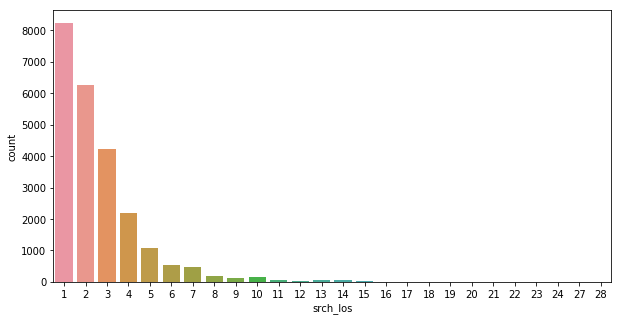

In [44]:
# Count the bookings as per the stay_duration
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot('srch_los',data=train[train['prop_booking_bool'] == 1],ax=ax)

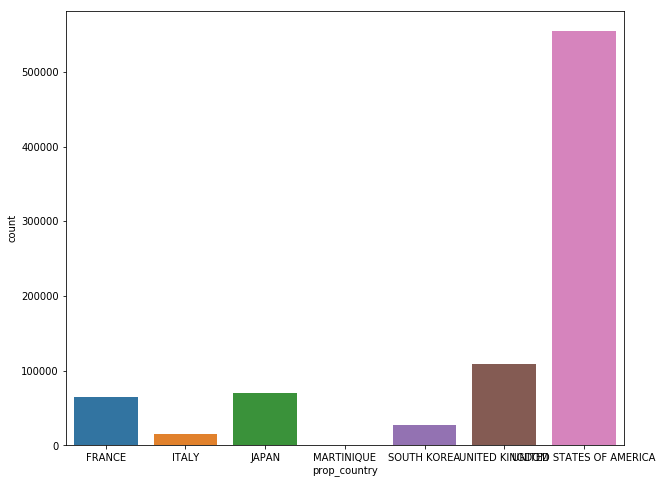

In [59]:
#what are the most countries the customer travel from?
fig, ax =plt.subplots(figsize=(10,8))

sns.countplot('prop_country',data=train.sort_values(by=['prop_country']),ax=ax)

In [ ]:
columns = ['date_time', 'srch_ci','visitor_id','srch_destination_type_id','srch_destination_id', 'site_name', 'user_location_region', 'user_location_city', 
                              'user_id', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']